In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import scipy.stats as stats
from sklearn import preprocessing

# Always make it pretty.
plt.style.use('seaborn-pastel')

%matplotlib inline
sns.set_style(style="whitegrid")

In [149]:
#establish groups, below and above median for income
us_median = 59_039

#import dataframe
eda_df = pd.read_csv('../ignorefiles/eda_data.csv')

In [148]:
eda_df['REVENUE_AMT'].astype('int')

0          0
1          6
2          0
3          0
4          0
          ..
1017126    0
1017127    0
1017128    0
1017129    0
1017130    0
Name: REVENUE_AMT, Length: 1017131, dtype: int64

In [147]:
eda_df['REVENUE_AMT'].sort_values(ascending=False)

740028    58440.60
740027    28297.65
756435    13498.50
108896    11111.96
696468    10007.44
            ...   
555366      -20.13
332560      -32.52
5008        -56.82
182759      -61.47
926461     -134.69
Name: REVENUE_AMT, Length: 1017131, dtype: float64

## NP plots

Unnamed: 0 STATE_x  zipcode      N1  N02650    A02650  avg_income  \
0                 0      AK    99501  7740.0  7740.0  581650.0   75.148579   
1                 1      AK    99501  7740.0  7740.0  581650.0   75.148579   
2                 2      AK    99501  7740.0  7740.0  581650.0   75.148579   
3                 3      AK    99501  7740.0  7740.0  581650.0   75.148579   
4                 4      AK    99501  7740.0  7740.0  581650.0   75.148579   
...             ...     ...      ...     ...     ...       ...         ...   
1017126     1017126      WY    83128   950.0   950.0   89831.0   94.558947   
1017127     1017127      WY    83128   950.0   950.0   89831.0   94.558947   
1017128     1017128      WY    83128   950.0   950.0   89831.0   94.558947   
1017129     1017129      WY    83128   950.0   950.0   89831.0   94.558947   
1017130     1017130      WY    83414   220.0   220.0   41804.0  190.018182   

                                                      NAME       CITY STATE_y  \
0        AFACT-ANCHORAGE FAITH & ACTION- CONGREGATIONS ...  ANCHORAGE      AK   
1                                    COVENANT HOUSE ALASKA  ANCHORAGE      AK   
2                                           HELPFUL HEARTS  ANCHORAGE      AK   
3             ALASKA CORRECTIONAL OFFICERS ASSOCIATION INC  ANCHORAGE      AK   
4                        SOBERMIUT REVIVING OUR SPIRIT INC  ANCHORAGE      AK   
...                                                    ...        ...     ...   
1017126                                   ALPINE FOOD BANK     ALPINE      WY   
1017127                                    AMERICAN LEGION     ALPINE      WY   
1017128                               NORTHSTAR FOUNDATION     ALPINE      WY   
1017129                                 TOP OF THE ROCKIES     ALPINE      WY   
1017130                       BUSTLE CREEK GIVING FARM INC       ALTA      WY   

                ZIP  SUBSECTION  CLASSIFICATION  FOUNDATION   ASSET_AMT  \
0        99501-2409           3            7200          15     45396.0   
1        99501-3625           3            1000          15  21108722.0   
2        99501-5791           3            1000          15         0.0   
3        99501-2519           5            3000           0   1846516.0   
4        99501-5231           3            2000          15         0.0   
...             ...         ...             ...         ...         ...   
1017126  83128-3921           3            1000          16         0.0   
1017127  83128-0662          19            1000           0         0.0   
1017128  83128-0274           3            1000          15    225000.0   
1017129  83128-0172           3            1000          16         0.0   
1017130  83414-4547           3            1000          16         0.0   

         INCOME_AMT  REVENUE_AMT NTEE_CD  
0          154543.0         0.15    X012  
1         8763496.0         6.82    P300  
2               0.0         0.00     P11  
3          915606.0         0.88     J40  
4               0.0         0.00     X20  
...             ...          ...     ...  
1017126         0.0         0.00     K31  
1017127         0.0         0.00     NaN  
1017128    225000.0         0.22     P99  
1017129         0.0         0.00     S80  
1017130         0.0         0.00     K30  

[1017131 rows x 18 columns]

In [175]:
#establish df for plotting num of NPs per State > city > zip
#plot on folium density map
#number of NPs registered with IRS by state


# #dual axis bar plot (reformat values to show in millions)

count = eda_df.groupby('STATE_x').count()[['REVENUE_AMT']]
revs = eda_df.groupby('STATE_x').sum()[['REVENUE_AMT']]

combined = pd.merge(count,revs, left_index=True,right_index=True).sort_values(by='REVENUE_AMT_x', ascending=False)

combined.REVENUE_AMT_y = round(combined['REVENUE_AMT_y']/1000000,2)

def dual_axis_plot(df, y1, y2, title, y1label, y2label, xlabel,filename):
    """function to plot bar and line on dual y-axis."""
    fig, ax1 = plt.subplots(figsize=(12,6))

    ax2 = ax1.twinx()
    ax1.bar(df.index, y1)
    ax2.plot(df.index,y2, 'c')
    ax1.set_xticklabels(df.index, rotation=90)
    ax1.set_xlabel(f'{xlabel}', size=12)
    ax1.set_ylabel(f'{y1label}', size=12)
    ax2.set_ylabel(f'{y2label}')
    ax1.set_title(f'{title}', size=15)
    ax1.grid()
    ax2.grid()

    plt.savefig(f'../images/{filename}.png')


    

In [156]:
combined.head(1)

REVENUE_AMT_x  REVENUE_AMT_y
STATE_x                              
CA              112227      254632.56

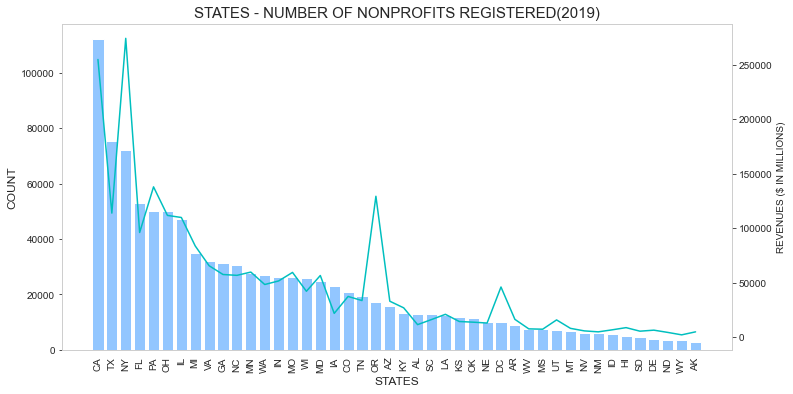

In [176]:
dual_axis_plot(combined, 
               combined['REVENUE_AMT_x'], 
               combined['REVENUE_AMT_y'],
              'STATES - NUMBER OF NONPROFITS REGISTERED(2019)',
              'COUNT',
              'REVENUES ($ IN MILLIONS)',
              'STATES',
              'num_nps')

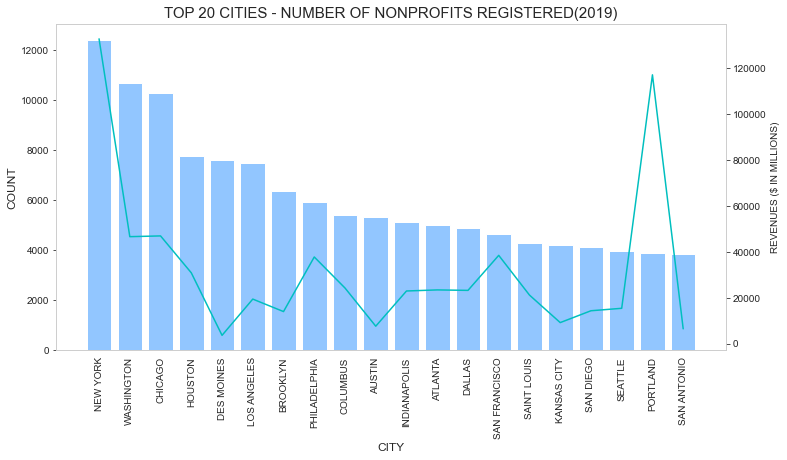

In [177]:
#establish df for plotting num of NPs per State > city > zip
#plot on folium density map
#number of NPs registered with IRS by city

count2 = eda_df.groupby('CITY').count()[['REVENUE_AMT']]
revs2 = eda_df.groupby('CITY').sum()[['REVENUE_AMT']]

combined2 = pd.merge(count2,revs2, left_index=True,right_index=True).nlargest(20, columns='REVENUE_AMT_x').sort_values(by='REVENUE_AMT_x', ascending=False)

combined2.REVENUE_AMT_y = round(combined2['REVENUE_AMT_y']/1000000,2)


dual_axis_plot(combined2, 
               combined2['REVENUE_AMT_x'], 
               combined2['REVENUE_AMT_y'],
              'TOP 20 CITIES - NUMBER OF NONPROFITS REGISTERED(2019)',
              'COUNT',
              'REVENUES ($ IN MILLIONS)',
              'CITY',
              'num_nps_city')

In [179]:
#nps by subsection, relevant because this will tell me 
#type of organization and if contributions are deductible
#deductible is not beind analyzed at this moment

#which subsection have the most NPs and where are they in the US

# #count per state
# npsubsec_per_state = eda_df.groupby(['STATE_x','SUBSECTION']).count()

# statesub_value = npsubsec_per_state['zipcode'].sort_values(ascending=False)
# statesub_index = statesub_value.index

# #sum of revenues per state (negative revs included)
# npsubsecrev_per_state = eda_df.groupby(['STATE_x','SUBSECTION']).sum()

# statesubrev_value = npsubsecrev_per_state['REVENUE_AMT'].sort_values(ascending=False)
# statesubrev_index = statesubrev_value.index

count3 = eda_df.groupby('SUBSECTION').count()[['REVENUE_AMT']]
revs3 = eda_df.groupby('SUBSECTION').sum()[['REVENUE_AMT']]

combined3 = pd.merge(count3,revs3, left_index=True,right_index=True).sort_values(by='REVENUE_AMT_x', ascending=False)

combined3.REVENUE_AMT_y = round(combined3['REVENUE_AMT_y']/1000000,2)

combined3.ren

combined3

REVENUE_AMT_x  REVENUE_AMT_y
SUBSECTION                              
3                  754487     1813671.23
4                   58125       82562.47
6                   47579       46592.06
5                   34965       23652.77
7                   33819       12778.65
8                   32518       16285.02
19                  23171        1164.18
10                  10387         347.77
13                   7815        1271.70
12                   4332       54452.14
9                    4301      119089.27
2                    3504        1178.88
14                   1293       23315.77
25                    297        1090.74
15                    201          50.04
91                    199          35.65
17                     59         154.54
1                      27         318.98
29                     14        1071.18
16                     10          34.19
0                       7           5.37
11                      4         133.49
82                      4          12.78
26                      3         115.55
27                      3        1882.51
50                      3           5.12
20                      2           1.11
18                      1         132.86
23                      1         130.32

In [7]:
#nps by foundation, where they receive most of their funding

#which foundations have the most NPs and where are they in the US

#count per state
npsubfou_per_state = eda_df.groupby(['STATE_x','SUBSECTION', 'FOUNDATION']).count()

statefou_value = npsubfou_per_state['zipcode'].sort_values(ascending=False)
statefou_index = statefou_value.index

#sum of revenues per state (negative revs included)
npsubfourev_per_state = eda_df.groupby(['STATE_x','SUBSECTION', 'FOUNDATION']).sum()

statesubrev_value = npsubfourev_per_state['REVENUE_AMT'].sort_values(ascending=False)
statesubrev_index = statesubrev_value.index


In [8]:
#nps by foundation, where they receive most of their funding

#which foundations have the most NPs and where are they in the US

#count per state
npfou2_per_state = eda_df.groupby(['FOUNDATION','STATE_x']).count()

statefou2_value = npfou2_per_state['zipcode'].sort_values(ascending=False)
statefou2_index = statefou2_value.index

#sum of revenues per state (negative revs included)
npfourev_per_state = eda_df.groupby(['FOUNDATION','STATE_x']).sum()

statefourev_value = npfourev_per_state['REVENUE_AMT'].sort_values(ascending=False)
statefourev_index = statefourev_value.index

In [9]:
#nps by foundation, where they receive most of their funding

#which foundations have the most NPs and where are they in the US

#count per foundation
npfou = eda_df.groupby(['FOUNDATION']).count()

fou_value = npfou['zipcode'].sort_values(ascending=False)
fou_index = fou_value.index

#sum of revenues per foundation (negative revs included)
npfourev = eda_df.groupby(['FOUNDATION']).sum()

fourev_value = npfourev['REVENUE_AMT'].sort_values(ascending=False)
fourev_index = fourev_value.index

In [10]:
#nps by foundation, where they receive most of their funding

#which foundations have the most NPs and where are they in the US

#count foundations per city
npfou2_per_city = eda_df.groupby(['FOUNDATION','CITY']).count()

cityfou2_value = npfou2_per_city['zipcode'].sort_values(ascending=False)
cityfou2_index = cityfou2_value.index

#sum of foundation revenues per city (negative revs included)
npfourev_per_city = eda_df.groupby(['FOUNDATION','CITY']).sum()

cityfourev_value = npfourev_per_city['REVENUE_AMT'].sort_values(ascending=False)
cityfourev_index = cityfourev_value.index

## Income Plots

In [11]:
#hist of income her state and/or zip

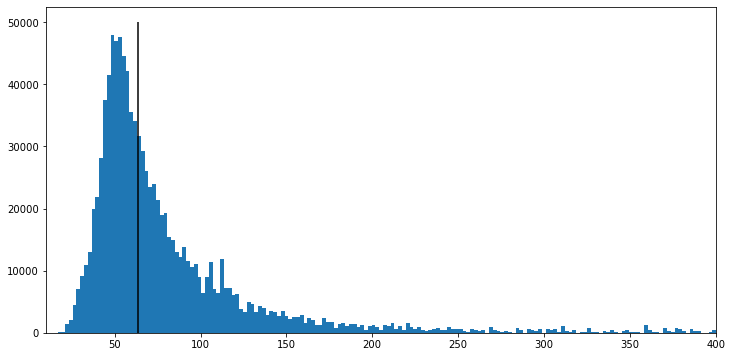

In [12]:
x = eda_df['avg_income']


plt.figure(figsize=(12,6))
plt.xlim(10, 400)
plt.vlines(x.median(),0,50000)
plt.hist(x, bins=1000)
plt.show()

#pareto distribution which is very typical for income 80% pop only has 20% of wealth/income

In [13]:
#box blot of 

## NP vs. Income Plots

In [14]:
#scatter plot by foundation vs avg income...



In [15]:
#density of nps
#density of income


## stats analysis

In [16]:
eda_df[eda_df['zipcode']==72404]

Unnamed: 0 STATE_x  zipcode       N1   N02650    A02650  avg_income  \
20961       20961      AR    72404  11760.0  11760.0  891315.0   75.792092   
20962       20962      AR    72404  11760.0  11760.0  891315.0   75.792092   
20963       20963      AR    72404  11760.0  11760.0  891315.0   75.792092   
20964       20964      AR    72404  11760.0  11760.0  891315.0   75.792092   
20965       20965      AR    72404  11760.0  11760.0  891315.0   75.792092   
20966       20966      AR    72404  11760.0  11760.0  891315.0   75.792092   
20967       20967      AR    72404  11760.0  11760.0  891315.0   75.792092   
20968       20968      AR    72404  11760.0  11760.0  891315.0   75.792092   
20969       20969      AR    72404  11760.0  11760.0  891315.0   75.792092   
20970       20970      AR    72404  11760.0  11760.0  891315.0   75.792092   
20971       20971      AR    72404  11760.0  11760.0  891315.0   75.792092   
20972       20972      AR    72404  11760.0  11760.0  891315.0   75.792092   
20973       20973      AR    72404  11760.0  11760.0  891315.0   75.792092   
20974       20974      AR    72404  11760.0  11760.0  891315.0   75.792092   
20975       20975      AR    72404  11760.0  11760.0  891315.0   75.792092   
20976       20976      AR    72404  11760.0  11760.0  891315.0   75.792092   
20977       20977      AR    72404  11760.0  11760.0  891315.0   75.792092   
20978       20978      AR    72404  11760.0  11760.0  891315.0   75.792092   
20979       20979      AR    72404  11760.0  11760.0  891315.0   75.792092   
20980       20980      AR    72404  11760.0  11760.0  891315.0   75.792092   
20981       20981      AR    72404  11760.0  11760.0  891315.0   75.792092   
20982       20982      AR    72404  11760.0  11760.0  891315.0   75.792092   
20983       20983      AR    72404  11760.0  11760.0  891315.0   75.792092   
20984       20984      AR    72404  11760.0  11760.0  891315.0   75.792092   
20985       20985      AR    72404  11760.0  11760.0  891315.0   75.792092   
20986       20986      AR    72404  11760.0  11760.0  891315.0   75.792092   
20987       20987      AR    72404  11760.0  11760.0  891315.0   75.792092   
20988       20988      AR    72404  11760.0  11760.0  891315.0   75.792092   
20989       20989      AR    72404  11760.0  11760.0  891315.0   75.792092   
20990       20990      AR    72404  11760.0  11760.0  891315.0   75.792092   
20991       20991      AR    72404  11760.0  11760.0  891315.0   75.792092   
20992       20992      AR    72404  11760.0  11760.0  891315.0   75.792092   
20993       20993      AR    72404  11760.0  11760.0  891315.0   75.792092   
20994       20994      AR    72404  11760.0  11760.0  891315.0   75.792092   
20995       20995      AR    72404  11760.0  11760.0  891315.0   75.792092   
20996       20996      AR    72404  11760.0  11760.0  891315.0   75.792092   
20997       20997      AR    72404  11760.0  11760.0  891315.0   75.792092   
20998       20998      AR    72404  11760.0  11760.0  891315.0   75.792092   
20999       20999      AR    72404  11760.0  11760.0  891315.0   75.792092   
21000       21000      AR    72404  11760.0  11760.0  891315.0   75.792092   
21001       21001      AR    72404  11760.0  11760.0  891315.0   75.792092   
21002       21002      AR    72404  11760.0  11760.0  891315.0   75.792092   
21003       21003      AR    72404  11760.0  11760.0  891315.0   75.792092   
21004       21004      AR    72404  11760.0  11760.0  891315.0   75.792092   
21005       21005      AR    72404  11760.0  11760.0  891315.0   75.792092   
21006       21006      AR    72404  11760.0  11760.0  891315.0   75.792092   
21007       21007      AR    72404  11760.0  11760.0  891315.0   75.792092   
21008       21008      AR    72404  11760.0  11760.0  891315.0   75.792092   
21009       21009      AR    72404  11760.0  11760.0  891315.0   75.792092   

                                                    NAME       CITY STATE_y  \
20961  DOWN SYNDROME ASSOCI

In [17]:
eda_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017131 entries, 0 to 1017130
Data columns (total 18 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   Unnamed: 0      1017131 non-null  int64  
 1   STATE_x         1017131 non-null  object 
 2   zipcode         1017131 non-null  int64  
 3   N1              1017131 non-null  float64
 4   N02650          1017131 non-null  float64
 5   A02650          1017131 non-null  float64
 6   avg_income      1017131 non-null  float64
 7   NAME            1017131 non-null  object 
 8   CITY            1017131 non-null  object 
 9   STATE_y         1017131 non-null  object 
 10  ZIP             1017131 non-null  object 
 11  SUBSECTION      1017131 non-null  int64  
 12  CLASSIFICATION  1017131 non-null  int64  
 13  FOUNDATION      1017131 non-null  int64  
 14  ASSET_AMT       1017131 non-null  float64
 15  INCOME_AMT      1017131 non-null  float64
 16  REVENUE_AMT     1017131 non-null  fl

In [18]:
a = eda_df[eda_df['avg_income'] < eda_df['avg_income'].median()]['REVENUE_AMT'].values
b = eda_df[eda_df['avg_income'] >= eda_df['avg_income'].median()]['REVENUE_AMT'].values

ttest, pvalue = stats.ttest_ind(a,b)

pvalue

1.308095060462163e-11

In [19]:
stat_df = eda_df[['avg_income', 'REVENUE_AMT']]

In [20]:
clean_teststat_df[stat_df['REVENUE_AMT']>0]

NameError: name 'clean_teststat_df' is not defined

In [ ]:
a = eda_df[eda_df['avg_income'] < eda_df['avg_income'].median()]['REVENUE_AMT'].values
b = eda_df[eda_df['avg_income'] >= eda_df['avg_income'].median()]['REVENUE_AMT'].values

ttest, pvalue = stats.ttest_ind(a,b)

pvalue